<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/ProyectoMLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer Proyecto de MLPs**

- El objetivo de este ejercicio es revisar todos los conceptos vistos en clase hasta ahora, para construir una arquitectura de red neuronal completamente conectada (MLP), que tenga el mejor desempeño posible sobre una tarea dada.

- La idea es que a través de la experimentación, lleguemos a construir un modelo robusto, que sirva como base para resolver otras tareas similares.

- El problema a resolver es de clasificación de imágenes usando CIFAR10.

##**Conjunto de Datos**

El conjunto de datos CIFAR10 tiene imágenes de 32x32 píxeles. Hay 50.000 imágenes de entrenamiento y 10.000 imágenes de pruebas. Cada imagen en CIFAR10 tiene asignada una de las diez clases disponibles.


In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np





Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input, Dense, concatenate
#from tensorflow.keras.models import Model

##**Etapas mínimas a realizar**

Las etapas se encuentran enumeradas














1. Separar los conjuntos de entrenamiento, validación y prueba correspondientes.

In [3]:
(X_train_full, y_train_full), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# conservamos la separacion entre entrenamiento X_train_full (50000) y prueba X_test (10000)
#separamos aleatoriamente X_train (37500) y X_valid (12500)

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
assert X_train_full.shape == (50000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)
assert X_train.shape == (37500, 32, 32, 3)
assert X_valid.shape == (12500, 32, 32, 3)

In [5]:
clases_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

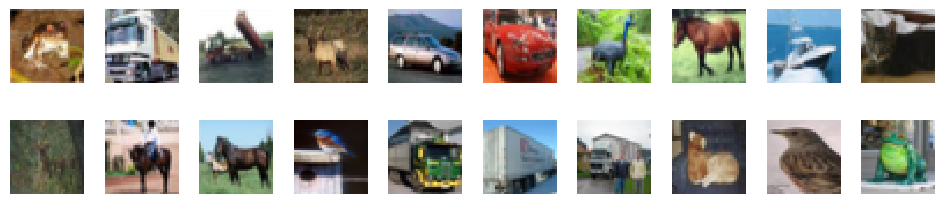

In [6]:
#Imprimimos los primeros 20 objetos
n_rows = 2
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):#
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(clases_names[y_train_full[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_valid=X_valid.reshape((X_valid.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3))

2. Aplicar escala y normalización, si lo cree conveniente.

In [8]:
#Reducimos las intensidades de los píxeles al rango 0-1 dividiéndolas por 255.
#con ello normalizamos los datos y evitamos inestabilidad numérica
X_train=X_train/255
X_valid=X_valid/255
X_test=X_test/255

3. Usar el enfoque funcional (functional API) para definir la arquitectura de la red neuronal MLP.

Se va definir una red neuronal no secuencial de enfoque functional API(wide and deep) con una sola entrada correspondiente al conjunto de entrenamiento. Esta arquitectura de red neuronal permite que aprenda tanto patrones profundos y reglas simples.

4. La arquitectura debe ser profunda, con por lo menos 5 capas densas. Definir un número de neuronas para cada capa oculta, función de costo y justificar esas elecciones.

El número de neuronas se va definir cuando se realice el entrenamiento, por ahora seleccionamos 300 neuronas en cada capa densa ya cuando realizamos el entrenamiento podremos cambiar con otro numero si el accuracy es bajo.

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#input_ = keras.layers.Input(shape=(32,32,3))

input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(500, activation='relu')(input_)
hidden2 = keras.layers.Dense(400, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(300, activation='relu')(hidden2)
hidden4 = keras.layers.Dense(200, activation='relu')(hidden3)
hidden5 = keras.layers.Dense(100, activation='relu')(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation='softmax')(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3072)]               0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 500)                  1536500   ['input_4[0][0]']             
                                                                                                  
 dense_19 (Dense)            (None, 400)                  200400    ['dense_18[0][0]']            
                                                                                                  
 dense_20 (Dense)            (None, 300)                  120300    ['dense_19[0][0]']            
                                                                                            

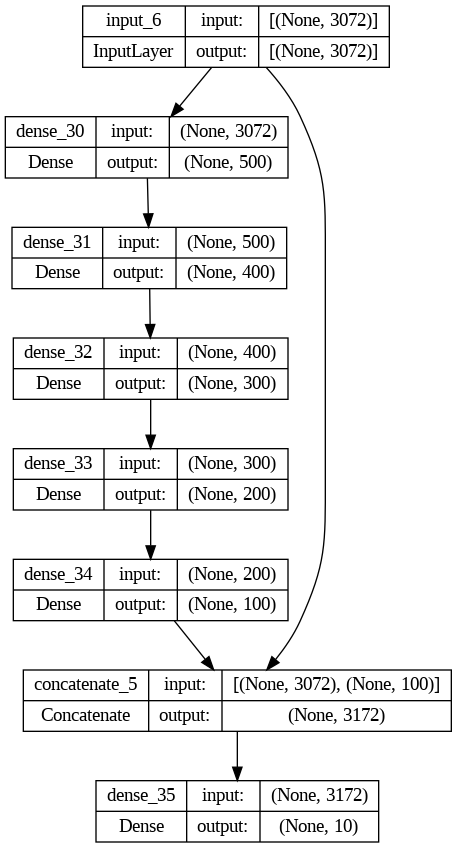

In [ ]:
keras.utils.plot_model(model, "my_cifar10_model.png", show_shapes=True)

In [ ]:
#compilamos el modelo con la función de costo y el optimizador
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#optimizer=keras.optimizers.SGD(learning_rate=1e-3)
#optimizer='adam'

 Para la arquitectura de nuestro modelo inicimos con 300 neuronas en todas las capas, pero puede variar el número  de neuronas según el resultado del accuracy, utilizamos como función de costo (sparse_categorical_crossentropy) porque se tiene etiquetas con las clases(indices de 0 a 9) y la métrica que usaremos para entrenamiento y validación será accuracy por ser un problema de clasificacion

5. Usar Callbacks: ModelCheckpoint y EarlyStopping al momento de entrenar.

In [ ]:
#usamos el callbacks para guardar checkpoints e interrumpir cuando no hay progreso
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo1_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo1_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 8s 6ms/step - loss: 1.9764 - accuracy: 0.3102 - val_loss: 1.8720 - val_accuracy: 0.3514
Epoch 2/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8835 - accuracy: 0.3456 - val_loss: 1.8678 - val_accuracy: 0.3494
Epoch 3/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8540 - accuracy: 0.3638 - val_loss: 1.9687 - val_accuracy: 0.3273
Epoch 4/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8340 - accuracy: 0.3710 - val_loss: 1.8897 - val_accuracy: 0.3547
Epoch 5/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8300 - accuracy: 0.3751 - val_loss: 1.8352 - val_accuracy: 0.3633
Epoch 6/100
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8233 - accuracy: 0.3799 - val_loss: 1.7975 - val_accuracy: 0.3804
Epoch 7/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8249 - accuracy: 0.3803 - val_loss: 1.8133 - val_ac

Se obtiene un accuracy de 0.3914, todavía muy bajo por tanto, es necesario realizar algunos ajustes a nuestro modelo con la finalidad de mejorar esta métrica.

6. Mostrar el gráfico de la función de costo en tiempo de entrenamiento vs tiempo de validación, para verificar si hay overfitting.

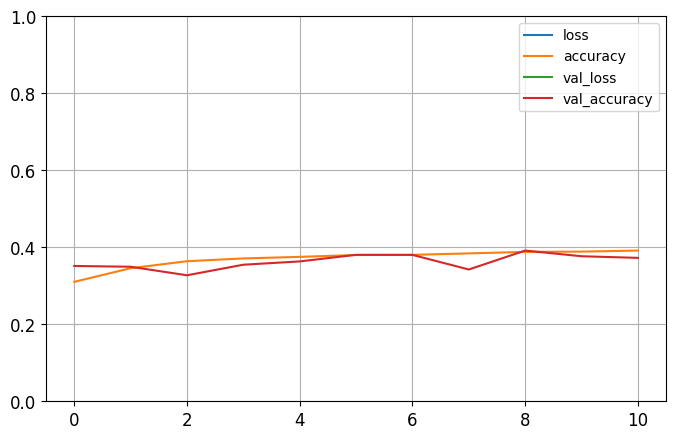

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

No se aprecia distanciamiento entre ambos gráficos por consiguiente podrías decir que no existe overfitting

6. Definir una función de activación y también un mecanismo de inicialización de pesos. Justificar esta elección.

A nuestro modelo ya definido le agregamos el inicializador de pesos y como nuestra función de activación con la que veniamos trabajando es relu le corresponde un inicializador he_normal. Esto se realiza con el objetivo de prevenir que los gradientes se vuelvan demasiado grandes o demasiado pequeños durante el entrenamiento

In [ ]:
input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(input_)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(hidden1)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(hidden2)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(hidden3)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo2_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo2_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 8s 6ms/step - loss: 1.9762 - accuracy: 0.3098 - val_loss: 1.8786 - val_accuracy: 0.3502
Epoch 2/100
  14/1172 [..............................] - ETA: 4s - loss: 1.8204 - accuracy: 0.3482

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1172/1172 [==============================] - 6s 5ms/step - loss: 1.8874 - accuracy: 0.3453 - val_loss: 1.8677 - val_accuracy: 0.3502
Epoch 3/100
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8553 - accuracy: 0.3621 - val_loss: 1.9755 - val_accuracy: 0.3267
Epoch 4/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8363 - accuracy: 0.3709 - val_loss: 1.8935 - val_accuracy: 0.3545
Epoch 5/100
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8302 - accuracy: 0.3752 - val_loss: 1.8367 - val_accuracy: 0.3612
Epoch 6/100
1172/1172 [==============================] - 8s 7ms/step - loss: 1.8231 - accuracy: 0.3791 - val_loss: 1.8066 - val_accuracy: 0.3770
Epoch 7/100
1172/1172 [==============================] - 8s 7ms/step - loss: 1.8247 - accuracy: 0.3799 - val_loss: 1.8165 - val_accuracy: 0.3782
Epoch 8/100
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8078 - accuracy: 0.3843 - val_loss: 1.9381 - val_accuracy: 0.34

Considerando el inicializador de pesos en cada capa con la finalidad que el aprendizaje mejore, logramos obtener un accuracy de 0.3907 y en comparación con el modelo anterior no logramos apreciar una mejora significativa.

7. Usar el mecanismo de Batch Normalization. Justificar la elección de sus hiperparámetros.

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.999)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)

bn_2 = keras.layers.BatchNormalization(momentum=0.999)(hidden1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)

bn_3 = keras.layers.BatchNormalization(momentum=0.999)(hidden2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)

bn_4 = keras.layers.BatchNormalization(momentum=0.999)(hidden3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)

bn_5 = keras.layers.BatchNormalization(momentum=0.999)(hidden4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)

concat = keras.layers.concatenate([input_, hidden5])

bn_6 = keras.layers.BatchNormalization(momentum=0.999)(concat)
output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
#model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo3_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo3_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 17s 10ms/step - loss: 2.0484 - accuracy: 0.3408 - val_loss: 1.9727 - val_accuracy: 0.2978
Epoch 2/100
1172/1172 [==============================] - 13s 11ms/step - loss: 1.8405 - accuracy: 0.3947 - val_loss: 1.8221 - val_accuracy: 0.3980
Epoch 3/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.7348 - accuracy: 0.4277 - val_loss: 1.7833 - val_accuracy: 0.4383
Epoch 4/100
1172/1172 [==============================] - 11s 9ms/step - loss: 1.6420 - accuracy: 0.4514 - val_loss: 1.7634 - val_accuracy: 0.4469
Epoch 5/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.5665 - accuracy: 0.4732 - val_loss: 1.6411 - val_accuracy: 0.4827
Epoch 6/100
1172/1172 [==============================] - 10s 9ms/step - loss: 1.4861 - accuracy: 0.4976 - val_loss: 1.6965 - val_accuracy: 0.4693
Epoch 7/100
1172/1172 [==============================] - 10s 9ms/step - loss: 1.4206 - accuracy: 0.5124 - val_loss: 1.65

Insertaremos una capa de bath normalizacion antes de cada capa densa, y como hiperparametros utilicé el momentum con un valor de 0.9 inicialmente y conseguí un accuracy menor a cuando utilicé el momentum de 0.999 (accuracy de 0.7136)

8. Usar un mecanismo de regularización (puede ser Dropout).

Con la finalidad de prevenir el sobreajuste hacemos uso de dropout, apagando cierta tasa de neuronas en cada capa.Se ha experimentado con diferentes tasas de Dropout 0.5 y 0.1 obteniendose como accuracy de 0.4695 y 0.6938 respectivamente, cabe recordar que el accuracy del modelo sin dropout fue 0.7136.
Nos quedamos con un dropout de 0.1 que fue el que logra incrementar ligeramente el accuracy con respecto al modelo anterior. Apesar que disminuya la precisión en entrenamiento con un dropout, sabemos también que el dropout mejora el modelo en los datos de validación.

In [23]:
from tensorflow.keras.layers import Input, Dense, Dropout

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)
dropout1 = Dropout(0.1)(hidden1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(dropout1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)
dropout2 = Dropout(0.1)(hidden2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(dropout2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)
dropout3 = Dropout(0.1)(hidden3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(dropout3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)
dropout4 = Dropout(0.1)(hidden4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(dropout4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)
dropout5=Dropout(0.1)(hidden5)


concat = keras.layers.concatenate([input_,dropout5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo4_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo4_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 16s 11ms/step - loss: 2.0722 - accuracy: 0.3325 - val_loss: 1.8495 - val_accuracy: 0.3881
Epoch 2/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.8722 - accuracy: 0.3874 - val_loss: 1.8862 - val_accuracy: 0.3994
Epoch 3/100
1172/1172 [==============================] - 11s 10ms/step - loss: 1.7817 - accuracy: 0.4101 - val_loss: 1.7332 - val_accuracy: 0.4323
Epoch 4/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.7044 - accuracy: 0.4320 - val_loss: 1.7035 - val_accuracy: 0.4450
Epoch 5/100
1172/1172 [==============================] - 11s 9ms/step - loss: 1.6405 - accuracy: 0.4505 - val_loss: 1.6117 - val_accuracy: 0.4669
Epoch 6/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.5721 - accuracy: 0.4693 - val_loss: 1.7140 - val_accuracy: 0.4449
Epoch 7/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.5131 - accuracy: 0.4816 - val_loss: 1.

9. Definir una función de optimización y justificar su elección.

Los modelos anteriores se entrenaron con el optimizador Adam, sin embargo realizaremos el entrenamiento con otro optimizador y este sería Nadam.

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)
dropout1 = Dropout(0.1)(hidden1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(dropout1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)
dropout2 = Dropout(0.1)(hidden2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(dropout2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)
dropout3 = Dropout(0.1)(hidden3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(dropout3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)
dropout4 = Dropout(0.1)(hidden4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(dropout4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)
dropout5=Dropout(0.1)(hidden5)


concat = keras.layers.concatenate([input_,dropout5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="NADAM",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo5_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo5_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 23s 12ms/step - loss: 2.0107 - accuracy: 0.3395 - val_loss: 1.8574 - val_accuracy: 0.3825
Epoch 2/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.8194 - accuracy: 0.3958 - val_loss: 1.8365 - val_accuracy: 0.4018
Epoch 3/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.7317 - accuracy: 0.4187 - val_loss: 1.6888 - val_accuracy: 0.4408
Epoch 4/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.6567 - accuracy: 0.4417 - val_loss: 1.7242 - val_accuracy: 0.4366
Epoch 5/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.5964 - accuracy: 0.4580 - val_loss: 1.6131 - val_accuracy: 0.4694
Epoch 6/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.5397 - accuracy: 0.4743 - val_loss: 1.6160 - val_accuracy: 0.4646
Epoch 7/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.4949 - accuracy: 0.4881 - val_loss: 1

Con el optimizador Adam se obtuvo 0.6938 y con el optimizador nadam accuracy: 0.6841, nos quedamos con el optimizador ADAM según los resultados obtenidos de precisión.

10. Encontrar una taza de aprendizaje adecuada usando alguna estrategia de *Learning Rate Scheduling*. Justificar la elección de sus hiperparámetros.

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [24]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)
dropout1 = Dropout(0.1)(hidden1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(dropout1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)
dropout2 = Dropout(0.1)(hidden2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(dropout2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)
dropout3 = Dropout(0.1)(hidden3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(dropout3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)
dropout4 = Dropout(0.1)(hidden4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(dropout4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)
dropout5=Dropout(0.1)(hidden5)


concat = keras.layers.concatenate([input_,dropout5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])


In [26]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo6_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [27]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo6_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 20s 11ms/step - loss: 2.0777 - accuracy: 0.3322 - val_loss: 1.8628 - val_accuracy: 0.3804
Epoch 2/100
   1/1172 [..............................] - ETA: 13s - loss: 1.7605 - accuracy: 0.4062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1172/1172 [==============================] - 12s 11ms/step - loss: 1.8837 - accuracy: 0.3850 - val_loss: 1.8600 - val_accuracy: 0.3992
Epoch 3/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.7874 - accuracy: 0.4122 - val_loss: 1.7321 - val_accuracy: 0.4346
Epoch 4/100
1172/1172 [==============================] - 13s 11ms/step - loss: 1.7049 - accuracy: 0.4334 - val_loss: 1.7126 - val_accuracy: 0.4458
Epoch 5/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.6356 - accuracy: 0.4512 - val_loss: 1.6230 - val_accuracy: 0.4641
Epoch 6/100
1172/1172 [==============================] - 14s 12ms/step - loss: 1.5713 - accuracy: 0.4707 - val_loss: 1.6980 - val_accuracy: 0.4506
Epoch 7/100
1172/1172 [==============================] - 12s 10ms/step - loss: 1.5200 - accuracy: 0.4772 - val_loss: 1.6167 - val_accuracy: 0.4598
Epoch 8/100
1172/1172 [==============================] - 11s 10ms/step - loss: 1.4673 - accuracy: 0.4948 - val_loss: 1.5799 - val_

Con el optimizador adam que resultó mejor que el nadam, y un learning de 0.001 de tiene un accuracy de 0.6634 y con un learning rate de 0.01 se obtiene un accuracy de 0.3988. Nos quedamos con el learning rate de 0.001 por ser el mejor.

11. Realizar un proceso de ajuste de hiperparámetros (los que considere convenientes), usando Keras Tuner.

In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [11]:
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [12]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=16, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")

    optimizer = hp.Choice("optimizer", values=["adam",'nadam'])
    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model


In [13]:
tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="afinacion_red", project_name="my_rnd_search", seed=42)#max_trials=5 experiemntos

In [14]:
tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 20s]
val_accuracy: 0.44391998648643494

Best val_accuracy So Far: 0.44391998648643494
Total elapsed time: 00h 10m 13s


In [15]:
top3_params = tuner.get_best_hyperparameters(num_trials=3)#parametros de los 3 modelos
top3_params[2].values  # best hyperparameter values del primer modelo

{'n_hidden': 15,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'adam'}

In [16]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 4 summary
Hyperparameters:
n_hidden: 9
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.44391998648643494


In [17]:
tuner.results_summary()

Results summary
Results in afinacion_red/my_rnd_search
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
n_hidden: 9
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.44391998648643494

Trial 0 summary
Hyperparameters:
n_hidden: 10
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: adam
Score: 0.37191998958587646

Trial 1 summary
Hyperparameters:
n_hidden: 15
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: adam
Score: 0.2778399884700775

Trial 3 summary
Hyperparameters:
n_hidden: 15
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: adam
Score: 0.23960000276565552

Trial 2 summary
Hyperparameters:
n_hidden: 8
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: nadam
Score: 0.10328000038862228


In [18]:
best_trial.metrics.get_last_value("val_accuracy")

0.44391998648643494

In [19]:
top3_params = tuner.get_best_hyperparameters(num_trials=3)

Con keras tuner podemos apreciar que para un modelo secuencial logramos obtener una accuracy de 0.438, pero con 15 capas ocultas y 100 neuronas cada una, siendo un número mayor de capas a los que consideramos.

usaremos Keras tuner para para nuestro modelo functional API

12. Reporte el resultado final en el conjunto de prueba usando la(s) métrica(s) de clasificación seleccionada(s).

El accuracy obtenido con el conjunto de datos de prueba es 0.5340

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4039 - accuracy: 0.5341


[1.4038548469543457, 0.5340999960899353]

13. Definir una segunda arquitectura reutilizando todas las capas y sus pesos (a excepción de la capa de salida) haciendo una conexión *wide and deep*, de las entradas. Mejora el resultado?

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

NameError: name 'np' is not defined

In [28]:
model1 = keras.models.load_model("mi_modelo6_keras.h5")

In [1]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

NameError: name 'tf' is not defined

In [ ]:
#separando las entradas

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")#se tiene solo una entrada, la entra A va tener 5 variables
##input_= keras.layers.Input(shape=X_train.shape[1:])

input_B = keras.layers.Input(shape=[6], name="deep_input")#La entrada B va tener 6 variables y es la entrada profunda




bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_B)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)
dropout1 = Dropout(0.1)(hidden1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(dropout1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)
dropout2 = Dropout(0.1)(hidden2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(dropout2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)
dropout3 = Dropout(0.1)(hidden3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(dropout3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)
dropout4 = Dropout(0.1)(hidden4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(dropout4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)
dropout5=Dropout(0.1)(hidden5)


concat = keras.layers.concatenate([input_A,dropout5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)


output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model2 = keras.models.Model(inputs=[input_A,input_B], outputs=[output])



##**Recomendaciones**

- Se pueden intentar otras optimizaciones adicionales, arquitecturas y afinamientos. El objetivo es intentar mejorar cada vez más la métrica del problema en cuestión.

- En la medida de lo posible, justifique las elecciones de arquitectura, hiperparámetros, etc.

- Es posible, que una arquitectura más simple resuelva mejor el problema, indicar esto después de haber probado la configuración básica propuesta.